In [1]:
"""
Provide code and solution for Application 4
"""

DESKTOP = True

import math
import random
import urllib2
import random

if DESKTOP:
    import matplotlib.pyplot as plt
    import similarity as student
else:
    import simpleplot
    import userXX_XXXXXXX as student
    

# URLs for data files
PAM50_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_PAM50.txt"
HUMAN_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_HumanEyelessProtein.txt"
FRUITFLY_EYELESS_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_FruitflyEyelessProtein.txt"
CONSENSUS_PAX_URL = "http://storage.googleapis.com/codeskulptor-alg/alg_ConsensusPAXDomain.txt"
WORD_LIST_URL = "http://storage.googleapis.com/codeskulptor-assets/assets_scrabble_words3.txt"



###############################################
# provided code

def read_scoring_matrix(filename):
    """
    Read a scoring matrix from the file named filename.  

    Argument:
    filename -- name of file containing a scoring matrix

    Returns:
    A dictionary of dictionaries mapping X and Y characters to scores
    """
    scoring_dict = {}
    scoring_file = urllib2.urlopen(filename)
    ykeys = scoring_file.readline()
    ykeychars = ykeys.split()
    for line in scoring_file.readlines():
        vals = line.split()
        xkey = vals.pop(0)
        scoring_dict[xkey] = {}
        for ykey, val in zip(ykeychars, vals):
            scoring_dict[xkey][ykey] = int(val)
    return scoring_dict




def read_protein(filename):
    """
    Read a protein sequence from the file named filename.

    Arguments:
    filename -- name of file containing a protein sequence

    Returns:
    A string representing the protein
    """
    protein_file = urllib2.urlopen(filename)
    protein_seq = protein_file.read()
    protein_seq = protein_seq.rstrip()
    return protein_seq


def read_words(filename):
    """
    Load word list from the file named filename.

    Returns a list of strings.
    """
    # load assets
    word_file = urllib2.urlopen(filename)
    
    # read in files as string
    words = word_file.read()
    
    # template lines and solution lines list of line string
    word_list = words.split('\n')
    print "Loaded a dictionary with", len(word_list), "words"
    return word_list


In [2]:
human_eyeless_protein = read_protein(HUMAN_EYELESS_URL)
fruitfly_eyeless_protein = read_protein(FRUITFLY_EYELESS_URL)
pam50 = read_scoring_matrix(PAM50_URL)
alignment_matrix = student.compute_alignment_matrix(human_eyeless_protein,fruitfly_eyeless_protein,pam50,False)
scores,alignment_human,alignment_fruitfly =  student.compute_local_alignment(human_eyeless_protein,
                                                                             fruitfly_eyeless_protein,pam50,alignment_matrix)
print scores
print alignment_human
print alignment_fruitfly

875
HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATPEVVSKIAQYKRECPSIFAWEIRDRLLSEGVCTNDNIPSVSSINRVLRNLASEK-QQ
HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRYYETGSIRPRAIGGSKPRVATAEVVSKISQYKRECPSIFAWEIRDRLLQENVCTNDNIPSVSSINRVLRNLAAQKEQQ


In [3]:
human_dash_less = alignment_human.replace('-','')
fruitfly_dash_less = alignment_fruitfly.replace('-','')
pax_domain = read_protein(CONSENSUS_PAX_URL)

def agree_percentage(seq_x,seq_y):
    length = len(seq_x)
    num = 0
    for i in range(length):
        if seq_x[i] == seq_y[i]:
            num += 1
    return float(num) / float(length)
alignment_matrix = student.compute_alignment_matrix(human_dash_less,pax_domain,pam50,True)
scores,seq_x,seq_y =  student.compute_global_alignment(human_dash_less,pax_domain,pam50,alignment_matrix)
print 'human is ',agree_percentage(seq_x,seq_y)
alignment_matrix = student.compute_alignment_matrix(fruitfly_dash_less,pax_domain,pam50,True)
scores,seq_x,seq_y =  student.compute_global_alignment(fruitfly_dash_less,pax_domain,pam50,alignment_matrix)
print 'fruitfly is ',agree_percentage(seq_x,seq_y)

human is  0.729323308271
fruitfly is  0.701492537313


In [4]:
acid = "ACBEDGFIHKMLNQPSRTWVYXZ"
rand_x = [acid[random.randrange(len(acid))] for _ in range(len(human_dash_less))]
rand_y = [acid[random.randrange(len(acid))] for _ in range(len(human_dash_less))]

alignment_matrix = student.compute_alignment_matrix(rand_x,rand_y,pam50,False)
scores,alignment_human,alignment_fruitfly =  student.compute_local_alignment(rand_x,
                                                                             rand_y,pam50,alignment_matrix)
human_dash_less = alignment_human.replace('-','')
fruitfly_dash_less = alignment_fruitfly.replace('-','')

alignment_matrix = student.compute_alignment_matrix(human_dash_less,pax_domain,pam50,True)
scores,seq_x,seq_y =  student.compute_global_alignment(human_dash_less,pax_domain,pam50,alignment_matrix)
print 'human is ',agree_percentage(seq_x,seq_y)
alignment_matrix = student.compute_alignment_matrix(fruitfly_dash_less,pax_domain,pam50,True)
scores,seq_x,seq_y =  student.compute_global_alignment(fruitfly_dash_less,pax_domain,pam50,alignment_matrix)
print 'fruitfly is ',agree_percentage(seq_x,seq_y)

human is  0.056
fruitfly is  0.08


In [5]:
import random
%matplotlib inline

In [6]:
def word_shuffle(string):
    word_list = list(string)
    random.shuffle(word_list)
    return ''.join(word_list)
def generate_null_distribution(seq_x, seq_y, scoring_matrix, num_trials) :
    scoring_distribution = {}
    for _ in range(num_trials):
        rand_y = word_shuffle(seq_y)
        alignment_matrix = student.compute_alignment_matrix(seq_x,rand_y,scoring_matrix,False)
        scores,_,_ =  student.compute_local_alignment(seq_x,rand_y,scoring_matrix,alignment_matrix)
        if scoring_distribution.has_key(scores):
            scoring_distribution[scores] += 1
        else:
            scoring_distribution[scores] = 1
    return scoring_distribution

distribution = generate_null_distribution(human_eyeless_protein,fruitfly_eyeless_protein,pam50,1000)

<Container object of 39 artists>

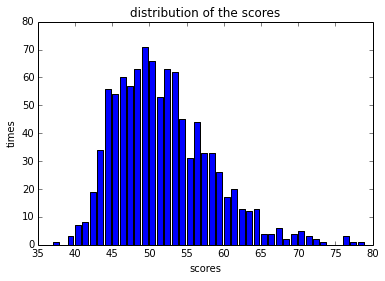

In [7]:
plt.xlabel('scores')
plt.ylabel('times')
plt.title('distribution of the scores')
plt.bar(distribution.keys(),distribution.values())

In [9]:
import numpy
import scipy
times = numpy.array(distribution.values())
scores = numpy.array(distribution.keys())
scores_mean = times.dot(scores)/1000
# D(X)= E(X^2) - E(X)*E(X)
temp = scores - scores_mean
temp = temp*temp
scores_var = numpy.sqrt(temp.dot(times)/1000)

In [10]:
alignment_matrix = student.compute_alignment_matrix(human_eyeless_protein,fruitfly_eyeless_protein,pam50,False)
scores,_,_ =  student.compute_local_alignment(human_eyeless_protein,fruitfly_eyeless_protein,pam50,alignment_matrix)
z_scores = (scores - scores_mean) / scores_var
print 'mean',scores_mean
print 'var',scores_var
print z_scores

mean 51
var 6.48074069841
127.145960369


In [42]:
all_words = read_words(WORD_LIST_URL)
def check_spelling(checked_word, dist, word_list) :
    '''
    check the spelling in word list
    '''
    all_char = 'abcdefghijklmnopqrstuvwxyz/:._1234567890'
    scores_matrix = student.build_scoring_matrix(all_char,1,0,0)
    wrong_words = set()
    for words in word_list:
        #print words
        alignment_matrix = student.compute_alignment_matrix(checked_word,words,scores_matrix,True)
        scores,seq_x,_ = student.compute_global_alignment(checked_word,words,scores_matrix,alignment_matrix)
        if len(seq_x)- scores <= dist:
            wrong_words.add(words)
    return wrong_words

Loaded a dictionary with 79340 words


In [43]:
check_spelling('humble',1,all_words)

{'bumble',
 'fumble',
 'humble',
 'humbled',
 'humbler',
 'humbles',
 'humbly',
 'jumble',
 'mumble',
 'rumble',
 'tumble'}

In [ ]:
all_char = 'abcdefghijklmnopqrstuvwxyz/:._1234567890'
scores_matrix = student.build_scoring_matrix(all_char,1,0,0)
alignment_matrix = student.compute_alignment_matrix('abc','abd',scores_matrix,True)
scores,seq_d,_ = student.compute_global_alignment('abc','abd',scores_matrix,alignment_matrix)
print scores
print seq_x

In [41]:
check_spelling('firefly',2,all_words)

set()

In [40]:
set(['bumble', 'fumble', 'humble', 'humbled', 'humbler', 'humbles', 'humbly', 'jumble', 'mumble', 'rumble', 'tumble'])
